<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/Final_analysis_ANALYSIS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis 1: The aim of this analysis is to compare two regression models to explain the variability of the number of births. **

**Importing the libraries**

***MODEL-01***

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing the dataset**


In [5]:
dataset = pd.read_csv('/content/sample_data/storks.csv')
x= dataset.iloc[:, 4:5].values
y = dataset.iloc[:, 2:3].values

**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

**Training the Simple Linear Regression model on the Training set**

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Test set results**

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
print(y_pred)
print(y_test)

[[ 1562.54485768]
 [13980.15119765]
 [ 3103.30436669]
 [ 2126.98150949]
 [ 5833.95735791]
 [ 1135.40360765]]
[[ 300]
 [3300]
 [   4]
 [5000]
 [5000]
 [   9]]


**Visualising the Training set results**

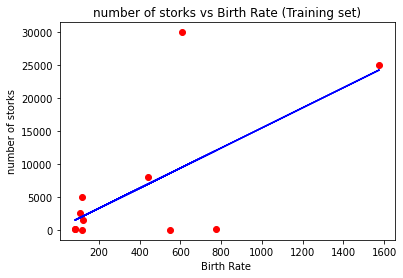

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('number of storks vs Birth Rate (Training set)')
plt.xlabel('Birth Rate ')
plt.ylabel('number of storks')
plt.show()

**b)	Use the bootstrap technique to estimate the distribution of the difference in the r2 parameter for the two models.**

# Resample Dataset

 Resample data points with replacement from the dataset of `x` inputs and
  `y` measurements.


In [14]:
print('Training Data Count: {}'.format(X_train.shape[0]))

print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 11
Testing Data Count: 6


In [15]:
x=X_train
y=y_train

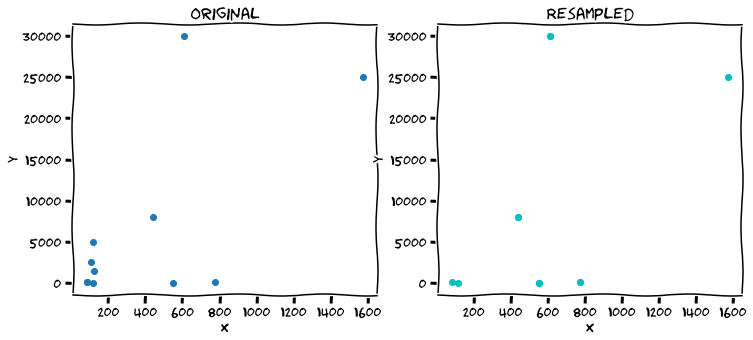

In [16]:
def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
  sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
  x_ = x[sample_]
  y_ = y[sample_]

  return x_, y_


with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.scatter(x, y)
  ax1.set(title='Original', xlabel='x', ylabel='y')

  x_, y_ = resample_with_replacement(x, y)
  ax2.scatter(x_, y_, color='c')

  ax2.set(title='Resampled', xlabel='x', ylabel='y',
          xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

# **models are fitted**

In [31]:
import statsmodels.api as sm

In [32]:
np.random.seed(123)
reg_fit11 = sm.OLS(y_, x_).fit()
print(reg_fit11.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.449
Method:                 Least Squares   F-statistic:                              9.964
Date:                Fri, 07 May 2021   Prob (F-statistic):                      0.0102
Time:                        07:39:46   Log-Likelihood:                         -117.75
No. Observations:                  11   AIC:                                      237.5
Df Residuals:                      10   BIC:                                      237.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [33]:
print('R2 for model two: ', reg_fit11.rsquared)

R2 for model two:  0.4991051113610999


**The steps are repeated many times and a distribution of the differences is plotted**

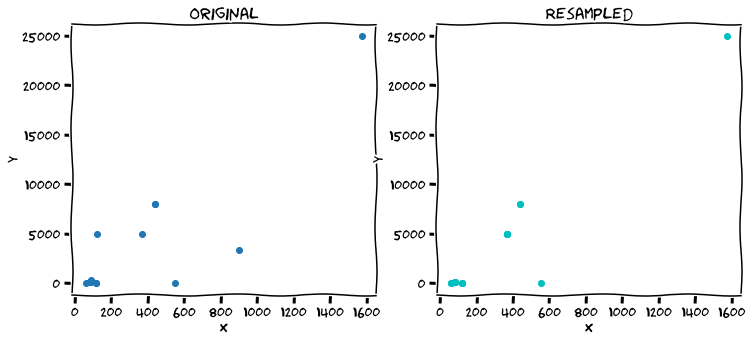

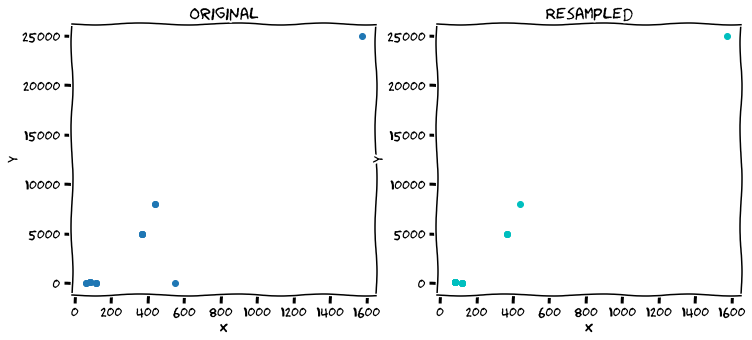

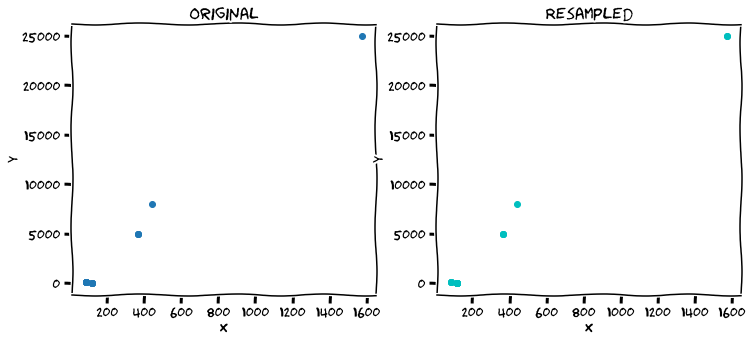

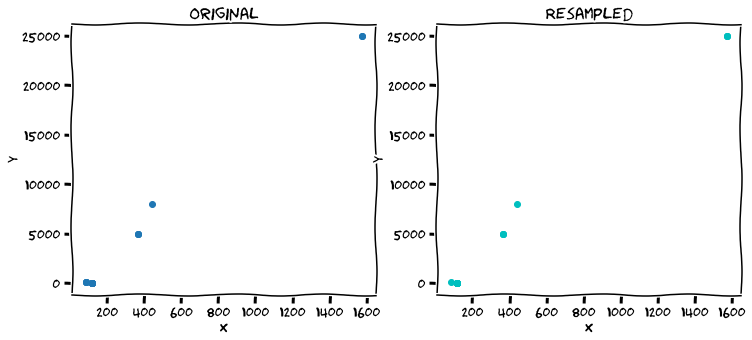

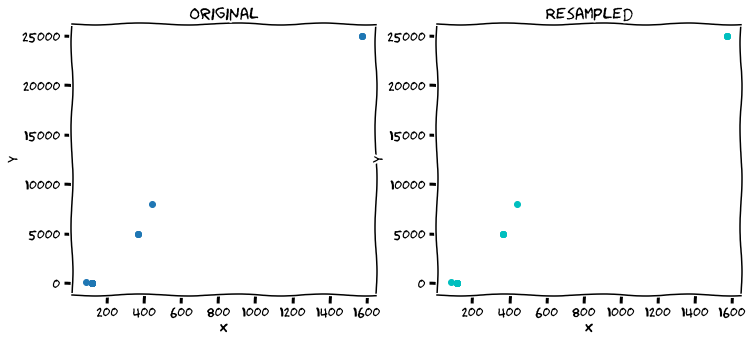

In [ ]:
for i in range(5):

  x=x_
  y=y_

  def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
    sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
    x_ = x[sample_]
    y_ = y[sample_]

    return x_, y_


  with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(x, y)
    ax1.set(title='Original', xlabel='x', ylabel='y')

    x_, y_ = resample_with_replacement(x, y)
    ax2.scatter(x_, y_, color='c')

    ax2.set(title='Resampled', xlabel='x', ylabel='y',
            xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

# ***MODEL-02***

In [38]:
x = dataset.iloc[:, 4:5].values
y = dataset.iloc[:, 3:4].values

**Splitting the dataset into the Training set and Test set**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

**Training the Simple Linear Regression model on the Training set**

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Test set results**

In [41]:
y_pred = regressor.predict(X_test)

**Visualising the Training set results**

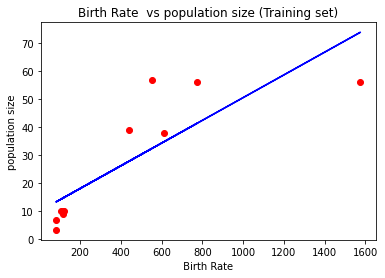

In [42]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Birth Rate  vs population size (Training set)')
plt.xlabel(' Birth Rate ')
plt.ylabel('population size')
plt.show()

# Resample Dataset

In [44]:
x=X_train
y=y_train

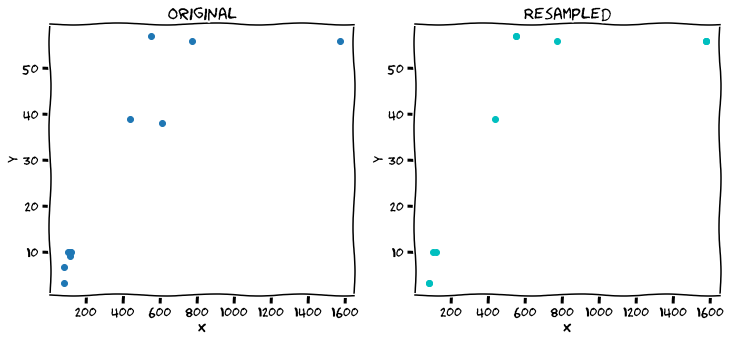

In [45]:
def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
  sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
  x_ = x[sample_]
  y_ = y[sample_]

  return x_, y_


with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.scatter(x, y)
  ax1.set(title='Original', xlabel='x', ylabel='y')

  x_, y_ = resample_with_replacement(x, y)
  ax2.scatter(x_, y_, color='c')

  ax2.set(title='Resampled', xlabel='x', ylabel='y',
          xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

# models are fitted

In [46]:
np.random.seed(123)
reg_fit22 = sm.OLS(y_, x_).fit()
print(reg_fit22)

In [47]:
print(reg_fit22.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              47.72
Date:                Fri, 07 May 2021   Prob (F-statistic):                    4.15e-05
Time:                        07:44:39   Log-Likelihood:                         -47.458
No. Observations:                  11   AIC:                                      96.92
Df Residuals:                      10   BIC:                                      97.31
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [48]:
print('R2 for model two: ', reg_fit22.rsquared)

R2 for model two:  0.8267625550625743


**•	The steps are repeated many times and a distribution of the differences is plotted**

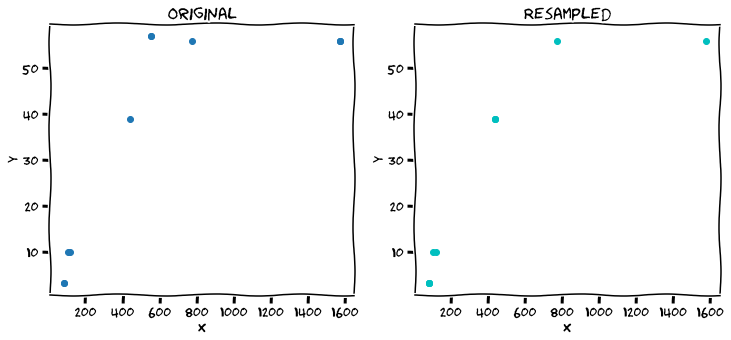

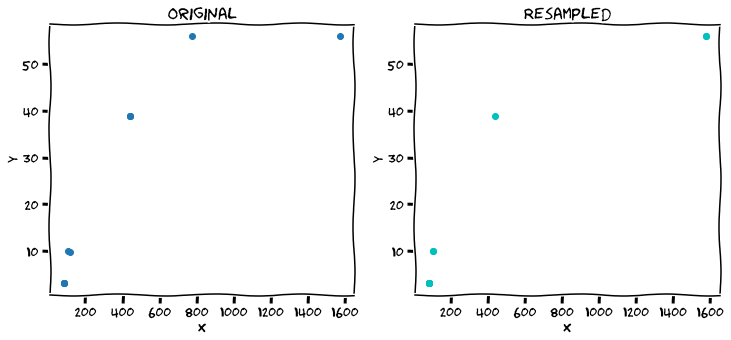

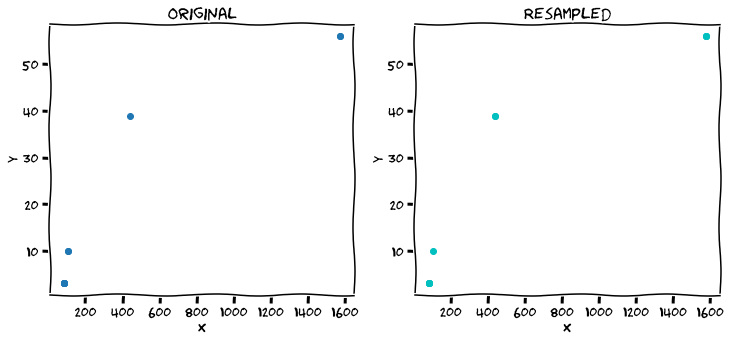

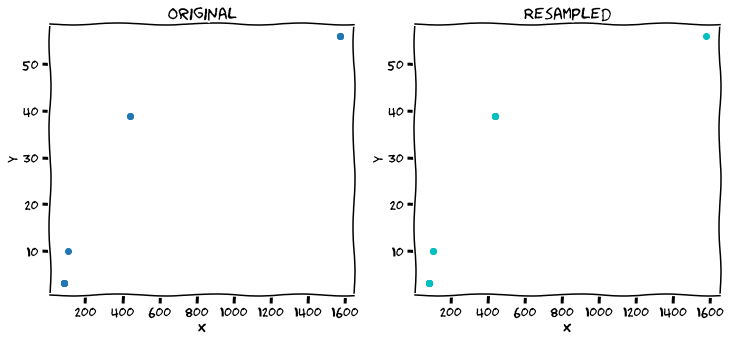

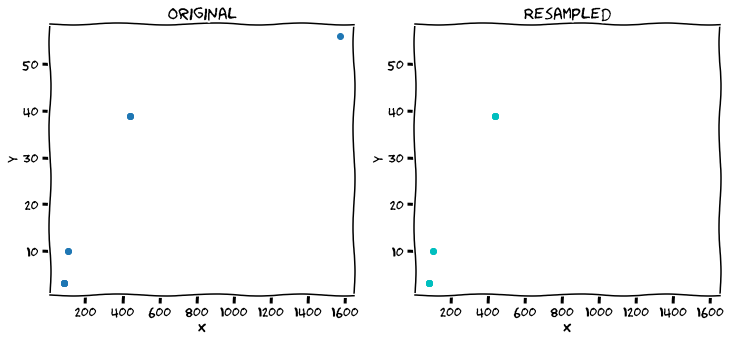

In [49]:
for i in range(5):

  x=x_
  y=y_

  def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
    sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
    x_ = x[sample_]
    y_ = y[sample_]

    return x_, y_


  with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(x, y)
    ax1.set(title='Original', xlabel='x', ylabel='y')

    x_, y_ = resample_with_replacement(x, y)
    ax2.scatter(x_, y_, color='c')

    ax2.set(title='Resampled', xlabel='x', ylabel='y',
            xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

In [53]:
print('R1 for model one: ', reg_fit11.rsquared)
print('R2 for model two: ', reg_fit22.rsquared)

R1 for model one:  0.4991051113610999
R2 for model two:  0.8267625550625743


model two R2 is lager than modal one R2 hence second model is good

R square is a simple but powerful metric that shows how much variance is explained by the model. It counts all variables you defined in X and gives a percentage of explanation. It is something like your model capabilities.

In my model, 82.6% of the variance can be explained, which is fairly high.and good model 

**Estimate appropriate confidence intervals for the difference in the r2 values.**

**By default, it is a 95% confidence level**

In [ ]:
print(reg_fit11.conf_int(0.05))

[[0.04617452 0.0814313 ]]


In [ ]:
print(reg_fit22.conf_int(0.05))

[[10.8727478  18.02593567]]


The confidence interval in first model which is a very narrow range.compare with second model .